In [1]:
import numpy as np
import matplotlib.pyplot as plt
from main_funcs import Legendre, Hermite, fft_aug, ifft_aug
from tqdm import tqdm

e:\File_VSCode\M3R\m3r_venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Signed area

In [2]:
t_arr = np.linspace(0, 2*np.pi, 100)
x_arr = np.sin(t_arr)+3

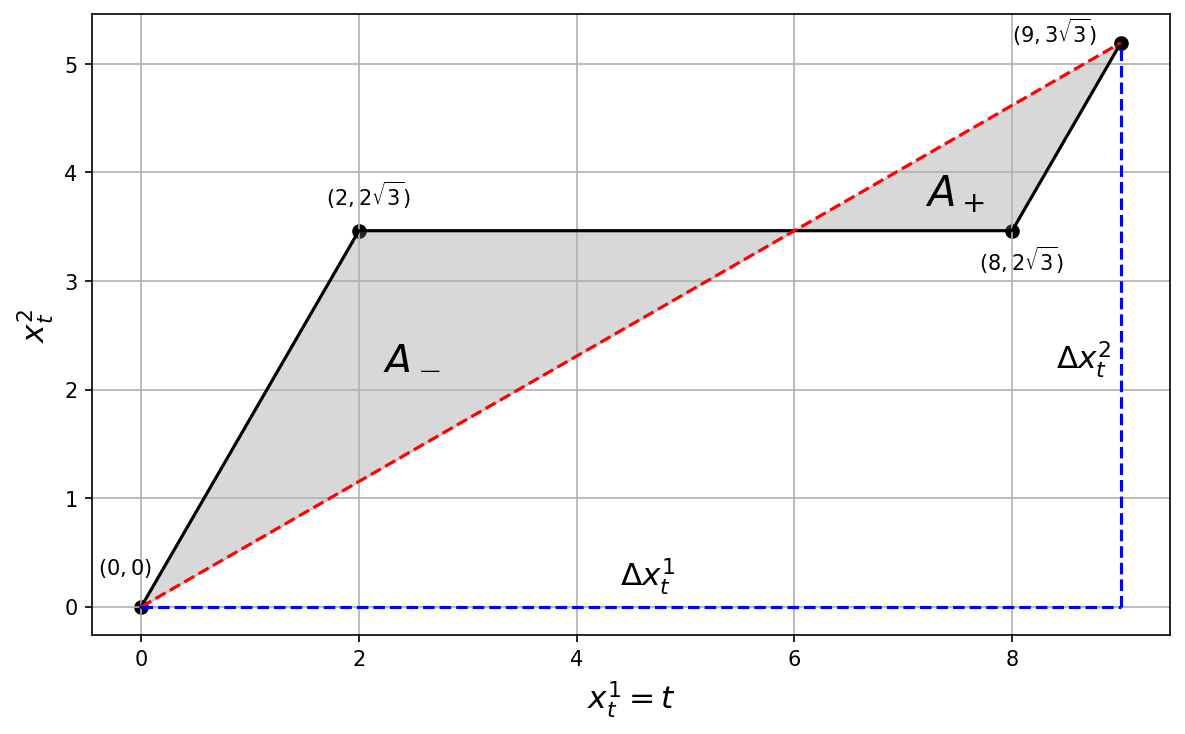

In [3]:
plt.figure(figsize=(8, 5), dpi=150)
plt.plot((0, 2, 8, 9), (0, 2*3**0.5, 2*3**0.5, 3*3**0.5), c='black')
plt.plot((0, 9), (0, 3*3**0.5), color='red', linestyle='dashed')
plt.scatter((0, 2, 8, 9), (0, 2*3**0.5, 2*3**0.5, 3*3**0.5), c='black')
plt.fill_between((0, 2, 8, 9), (0, 2*3**0.5, 2*3**0.5, 3*3**0.5), (0, 2/3**0.5, 2*3**0.5+2/3**0.5, 3*3**0.5),
                 facecolor="orange", # The fill color
                 color='grey',       # The outline color
                 alpha=0.3)
plt.hlines(0, 0, 9, colors='b', linestyles='dashed')
plt.vlines(9, 0, 3*3**0.5, colors='b', linestyles='dashed')
plt.annotate(r'$(0, 0)$', (-0.4, 0.3))
plt.annotate(r'$(2, 2\sqrt{3})$', (1.7, 3.7))
plt.annotate(r'$(8, 2\sqrt{3})$', (7.7, 3.1))
plt.annotate(r'$(9, 3\sqrt{3})$', (8, 5.2))
plt.annotate(r'$\Delta x_t^1$', (4.4, 0.2), fontsize=15)
plt.annotate(r'$\Delta x_t^2$', (8.4, 2.2), fontsize=15)
plt.annotate(r'$A_-$', (2.2, 2.2), fontsize=20)
plt.annotate(r'$A_+$', (7.2, 3.7), fontsize=20)
plt.ylabel(r'$x^2_t$', fontsize=15)
plt.xlabel(r'$x^1_t=t$', fontsize=15)
plt.grid()
plt.tight_layout()
plt.savefig('signed_area.pdf')

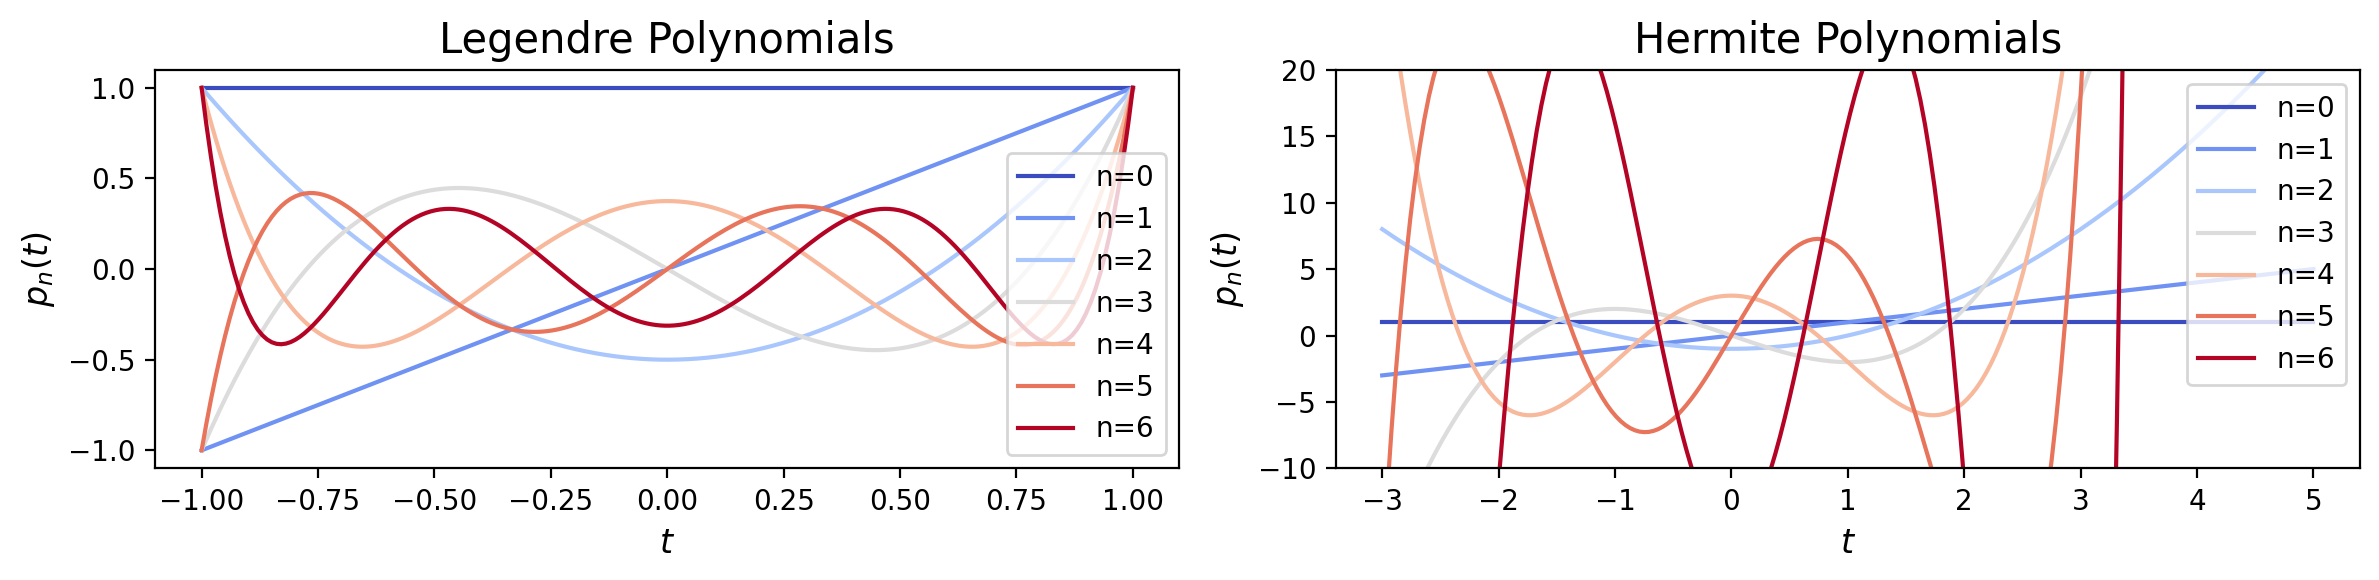

In [4]:
N = 7
cmap = plt.get_cmap('coolwarm')
colors = cmap(np.linspace(0, 1, N))

plt.figure(figsize=(12, 3), dpi=200)
plt.subplot(1, 2, 1)
t_grid = np.linspace(-1, 1, 200)
poly = Legendre()
for n in range(N):
    plt.plot(t_grid, poly.P(n)(t_grid), color=colors[n], label=f'n={n}')
plt.legend(loc='best')
plt.title('Legendre Polynomials', fontsize=15)
plt.xlabel(r'$t$', fontsize=12)
plt.ylabel(r'$p_n(t)$', fontsize=12)
plt.subplot(1, 2, 2)
t_grid = np.linspace(-3, 5, 200)
poly = Hermite(0, 1)
for n in range(N):
    plt.plot(t_grid, poly.P(n)(t_grid), color=colors[n], label=f'n={n}')
plt.ylim(-10, 20)
plt.legend(loc='upper right')
plt.title('Hermite Polynomials', fontsize=15)
plt.xlabel(r'$t$', fontsize=12)
plt.ylabel(r'$p_n(t)$', fontsize=12)
plt.tight_layout()
plt.savefig('orthopoly.pdf')

### error estimates of Orthogonal polynomials and Fourier

In [71]:
N=51
length = 105
t_grid = np.linspace(-1, 1, length)
def x1(t):
    return np.cos(10*t) - np.sin(2*np.pi*t)
def x2(t):
    return np.sin(10*t) + np.exp(2*t) - t
def x3(t):
    return 2 * np.abs(2 * (t % 1) - 1) - 1

cmap = plt.get_cmap('coolwarm')
colors = cmap(np.linspace(0, 1, N))
n_arr = np.arange(2, N)

 24%|██▎       | 12/51 [00:00<00:00, 109.24it/s]e:\File_VSCode\M3R\M3R_LMU\main_funcs.py:117: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  an = quad(lambda t: x(t)*P_n(t)*self.weight(t), self.x1, self.x2)[0]/snorm_n
e:\File_VSCode\M3R\M3R_LMU\main_funcs.py:117: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  an = quad(lambda t: x(t)*P_n(t)*self.weight(t), self.x1, self.x2)[0]/snorm_n
 45%|████▌     | 23/51 [00:02<00:03,  7.56it/s] e:\File_VSCode\M3R\M3R_LMU\main

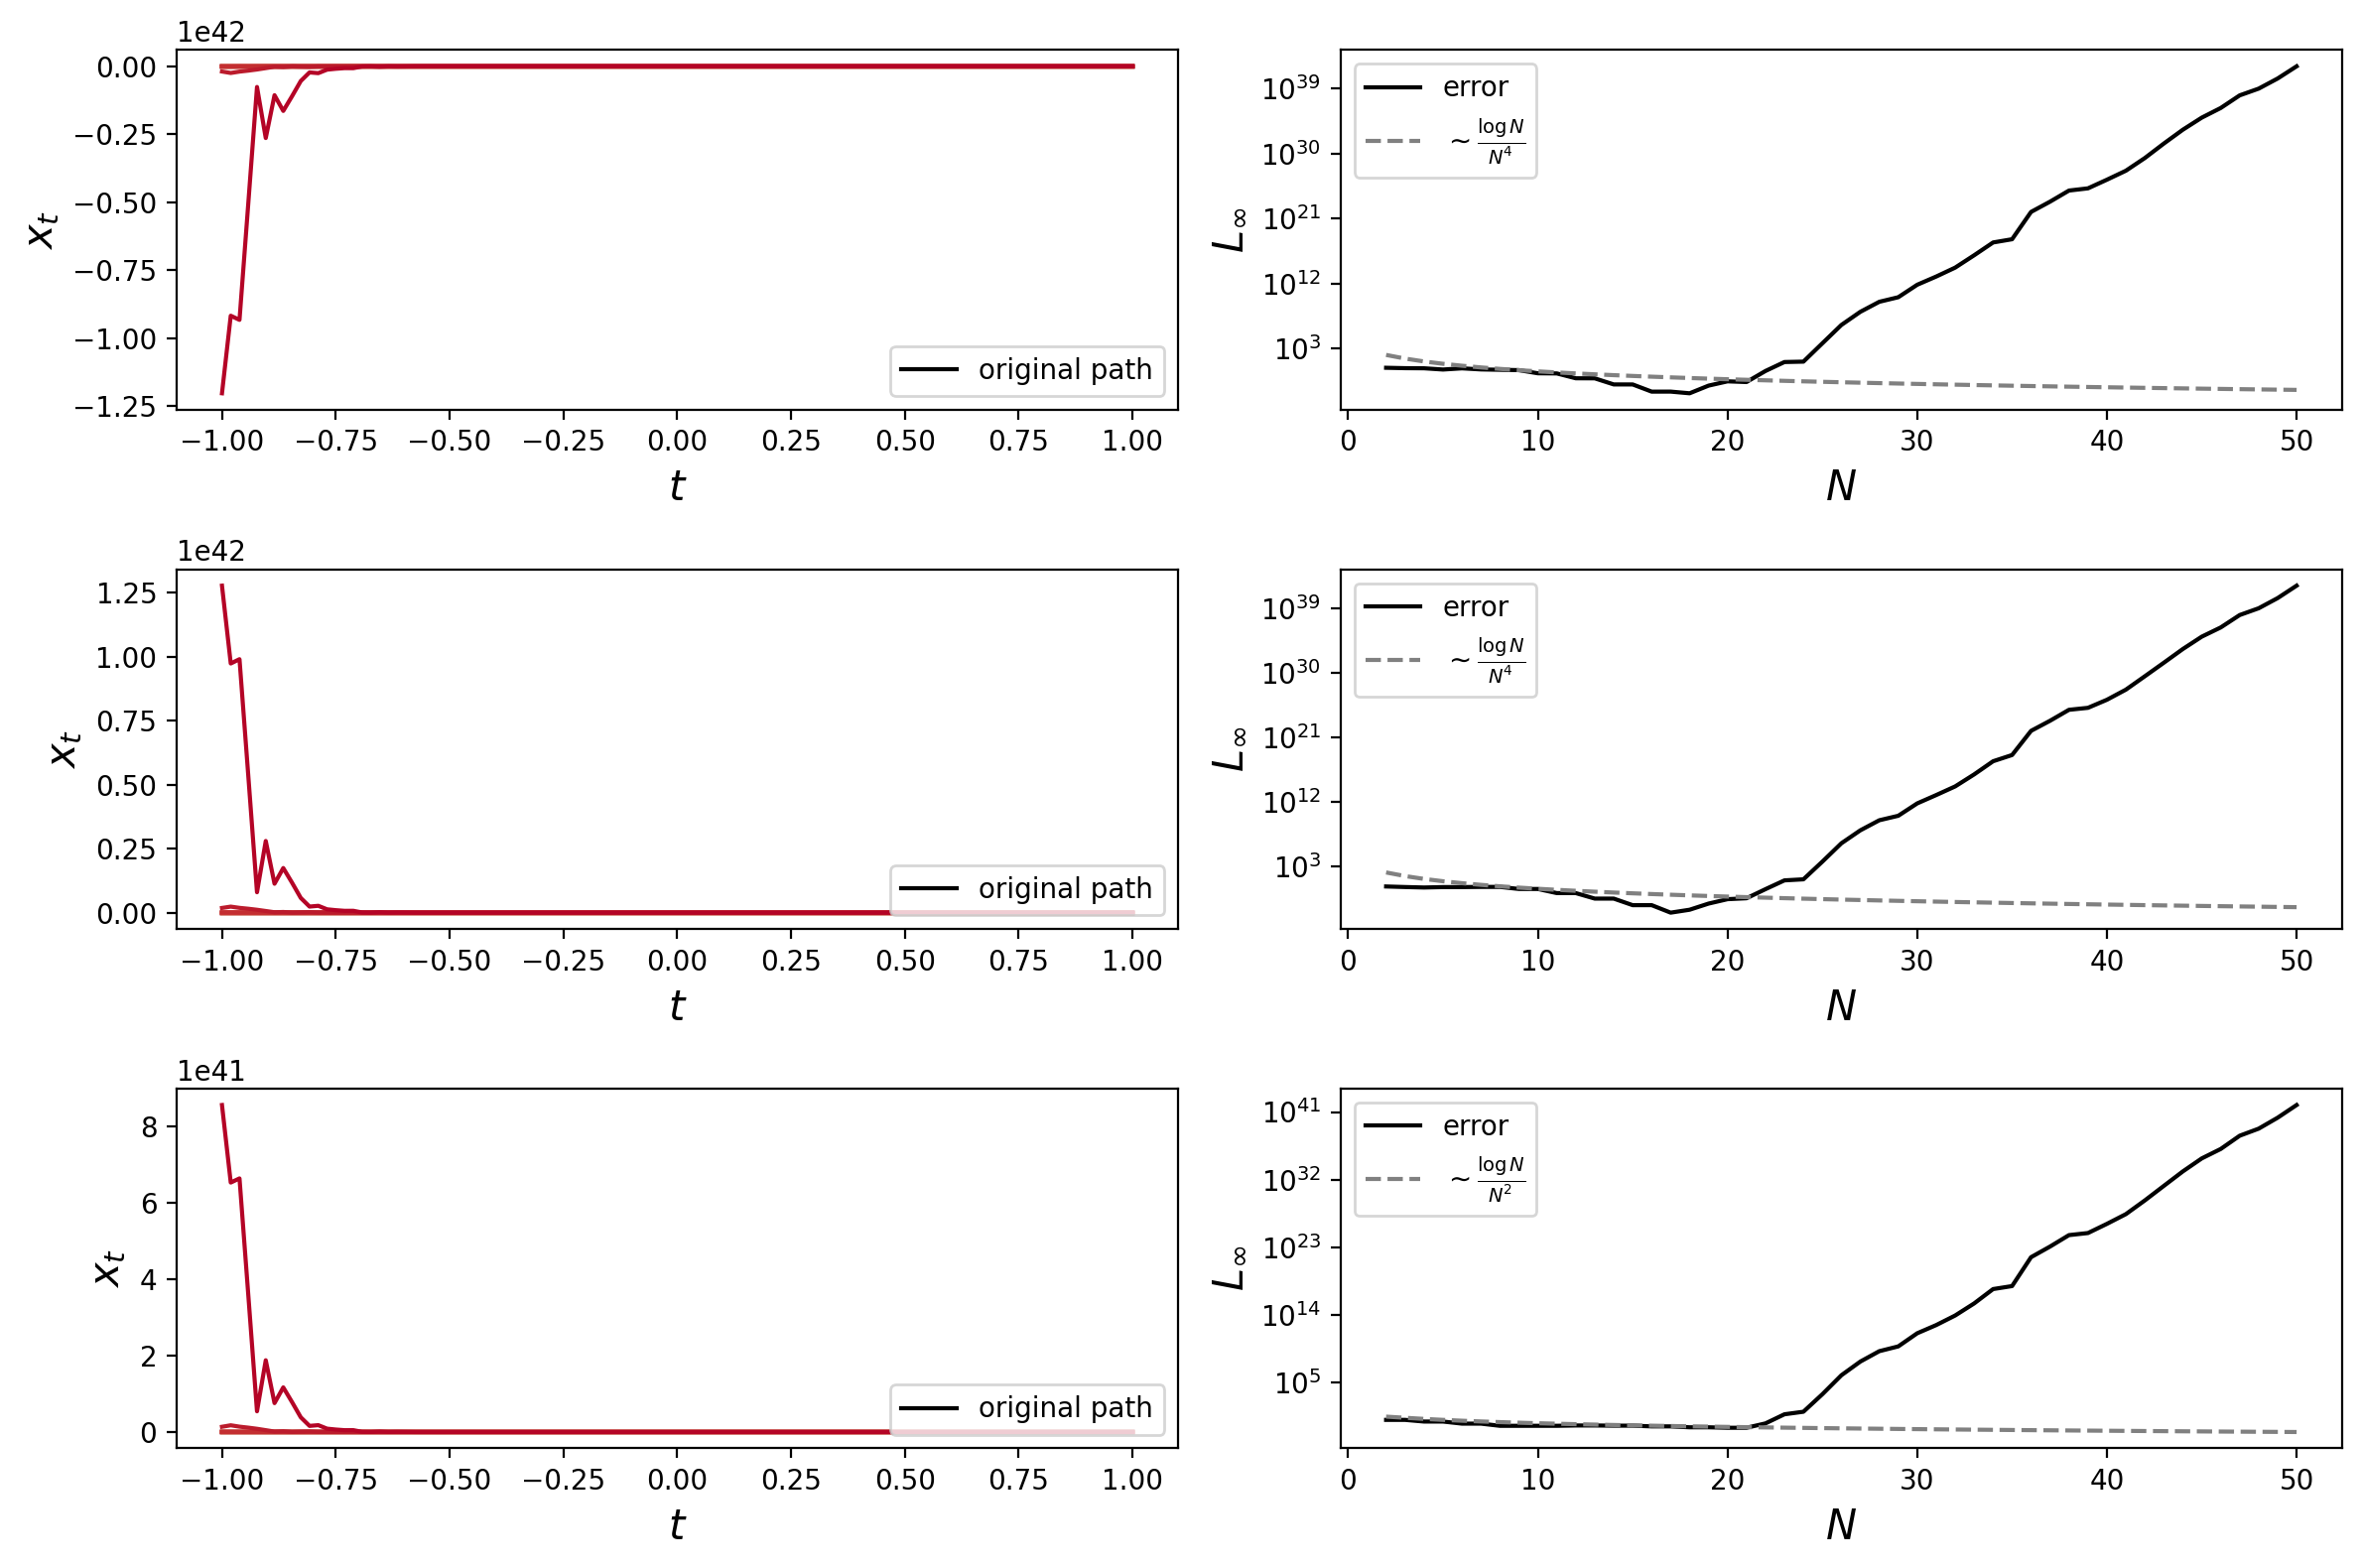

In [72]:
poly = Legendre()
plt.figure(figsize=(12, 8), dpi=200)

plt.subplot(3, 2, 1)
plt.plot(t_grid, x1(t_grid), color='black', label='original path')
for n in tqdm(range(N)):
    plt.plot(t_grid, poly.ploy2path(x1, n, t_grid), color=colors[n])
plt.xlabel(r'$t$', fontsize=15)
plt.ylabel(r'$x_t$', fontsize=15)
plt.legend(loc='lower right')

plt.subplot(3, 2, 2)
plt.plot(n_arr, [np.max(np.abs(poly.ploy2path(x1, n, t_grid)-x1(t_grid))) for n in n_arr], color='black', label='error')
plt.plot(n_arr, 3000*np.log(n_arr)/n_arr**4, color='grey', label=r'$\sim\frac{\log N}{N^4}$', linestyle='--')
plt.yscale('log')
plt.xlabel(r'$N$', fontsize=15)
plt.ylabel(r'$L_{\infty}$', fontsize=15)
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(t_grid, x2(t_grid), color='black', label='original path')
for n in tqdm(range(N)):
    plt.plot(t_grid, poly.ploy2path(x2, n, t_grid), color=colors[n])
plt.xlabel(r'$t$', fontsize=15)
plt.ylabel(r'$x_t$', fontsize=15)
plt.legend(loc='lower right')

plt.subplot(3, 2, 4)
plt.plot(n_arr, [np.max(np.abs(poly.ploy2path(x2, n, t_grid)-x2(t_grid))) for n in n_arr], color='black', label='error')
plt.plot(n_arr, 3000*np.log(n_arr)/n_arr**4, color='grey', label=r'$\sim\frac{\log N}{N^4}$', linestyle='--')
plt.yscale('log')
plt.xlabel(r'$N$', fontsize=15)
plt.ylabel(r'$L_{\infty}$', fontsize=15)
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(t_grid, x3(t_grid), color='black', label='original path')
for n in tqdm(range(N)):
    plt.plot(t_grid, poly.ploy2path(x3, n, t_grid), color=colors[n])
plt.xlabel(r'$t$', fontsize=15)
plt.ylabel(r'$x_t$', fontsize=15)
plt.legend(loc='lower right')

plt.subplot(3, 2, 6)
plt.plot(n_arr, [np.max(np.abs(poly.ploy2path(x3, n, t_grid)-x3(t_grid))) for n in n_arr], color='black', label='error')
plt.plot(n_arr, 18*np.log(n_arr)/n_arr**2, color='grey', label=r'$\sim\frac{\log N}{N^2}$', linestyle='--')
plt.yscale('log')
plt.xlabel(r'$N$', fontsize=15)
plt.ylabel(r'$L_{\infty}$', fontsize=15)
plt.legend()
plt.tight_layout()
# plt.savefig('orthopoly_convergence.pdf')
plt.show()

In [73]:
N=16
length = 105
t_grid = np.linspace(-1, 1, length)
def x1(t):
    return np.cos(10*t) - np.sin(2*np.pi*t)
def x2(t):
    return np.sin(10*t) + np.exp(2*t) - t
def x3(t):
    return 2 * np.abs(2 * (t % 1) - 1) - 1

cmap = plt.get_cmap('coolwarm')
colors = cmap(np.linspace(0, 1, N))
n_arr = np.arange(2, N)

100%|██████████| 14/14 [00:00<00:00, 1190.40it/s]


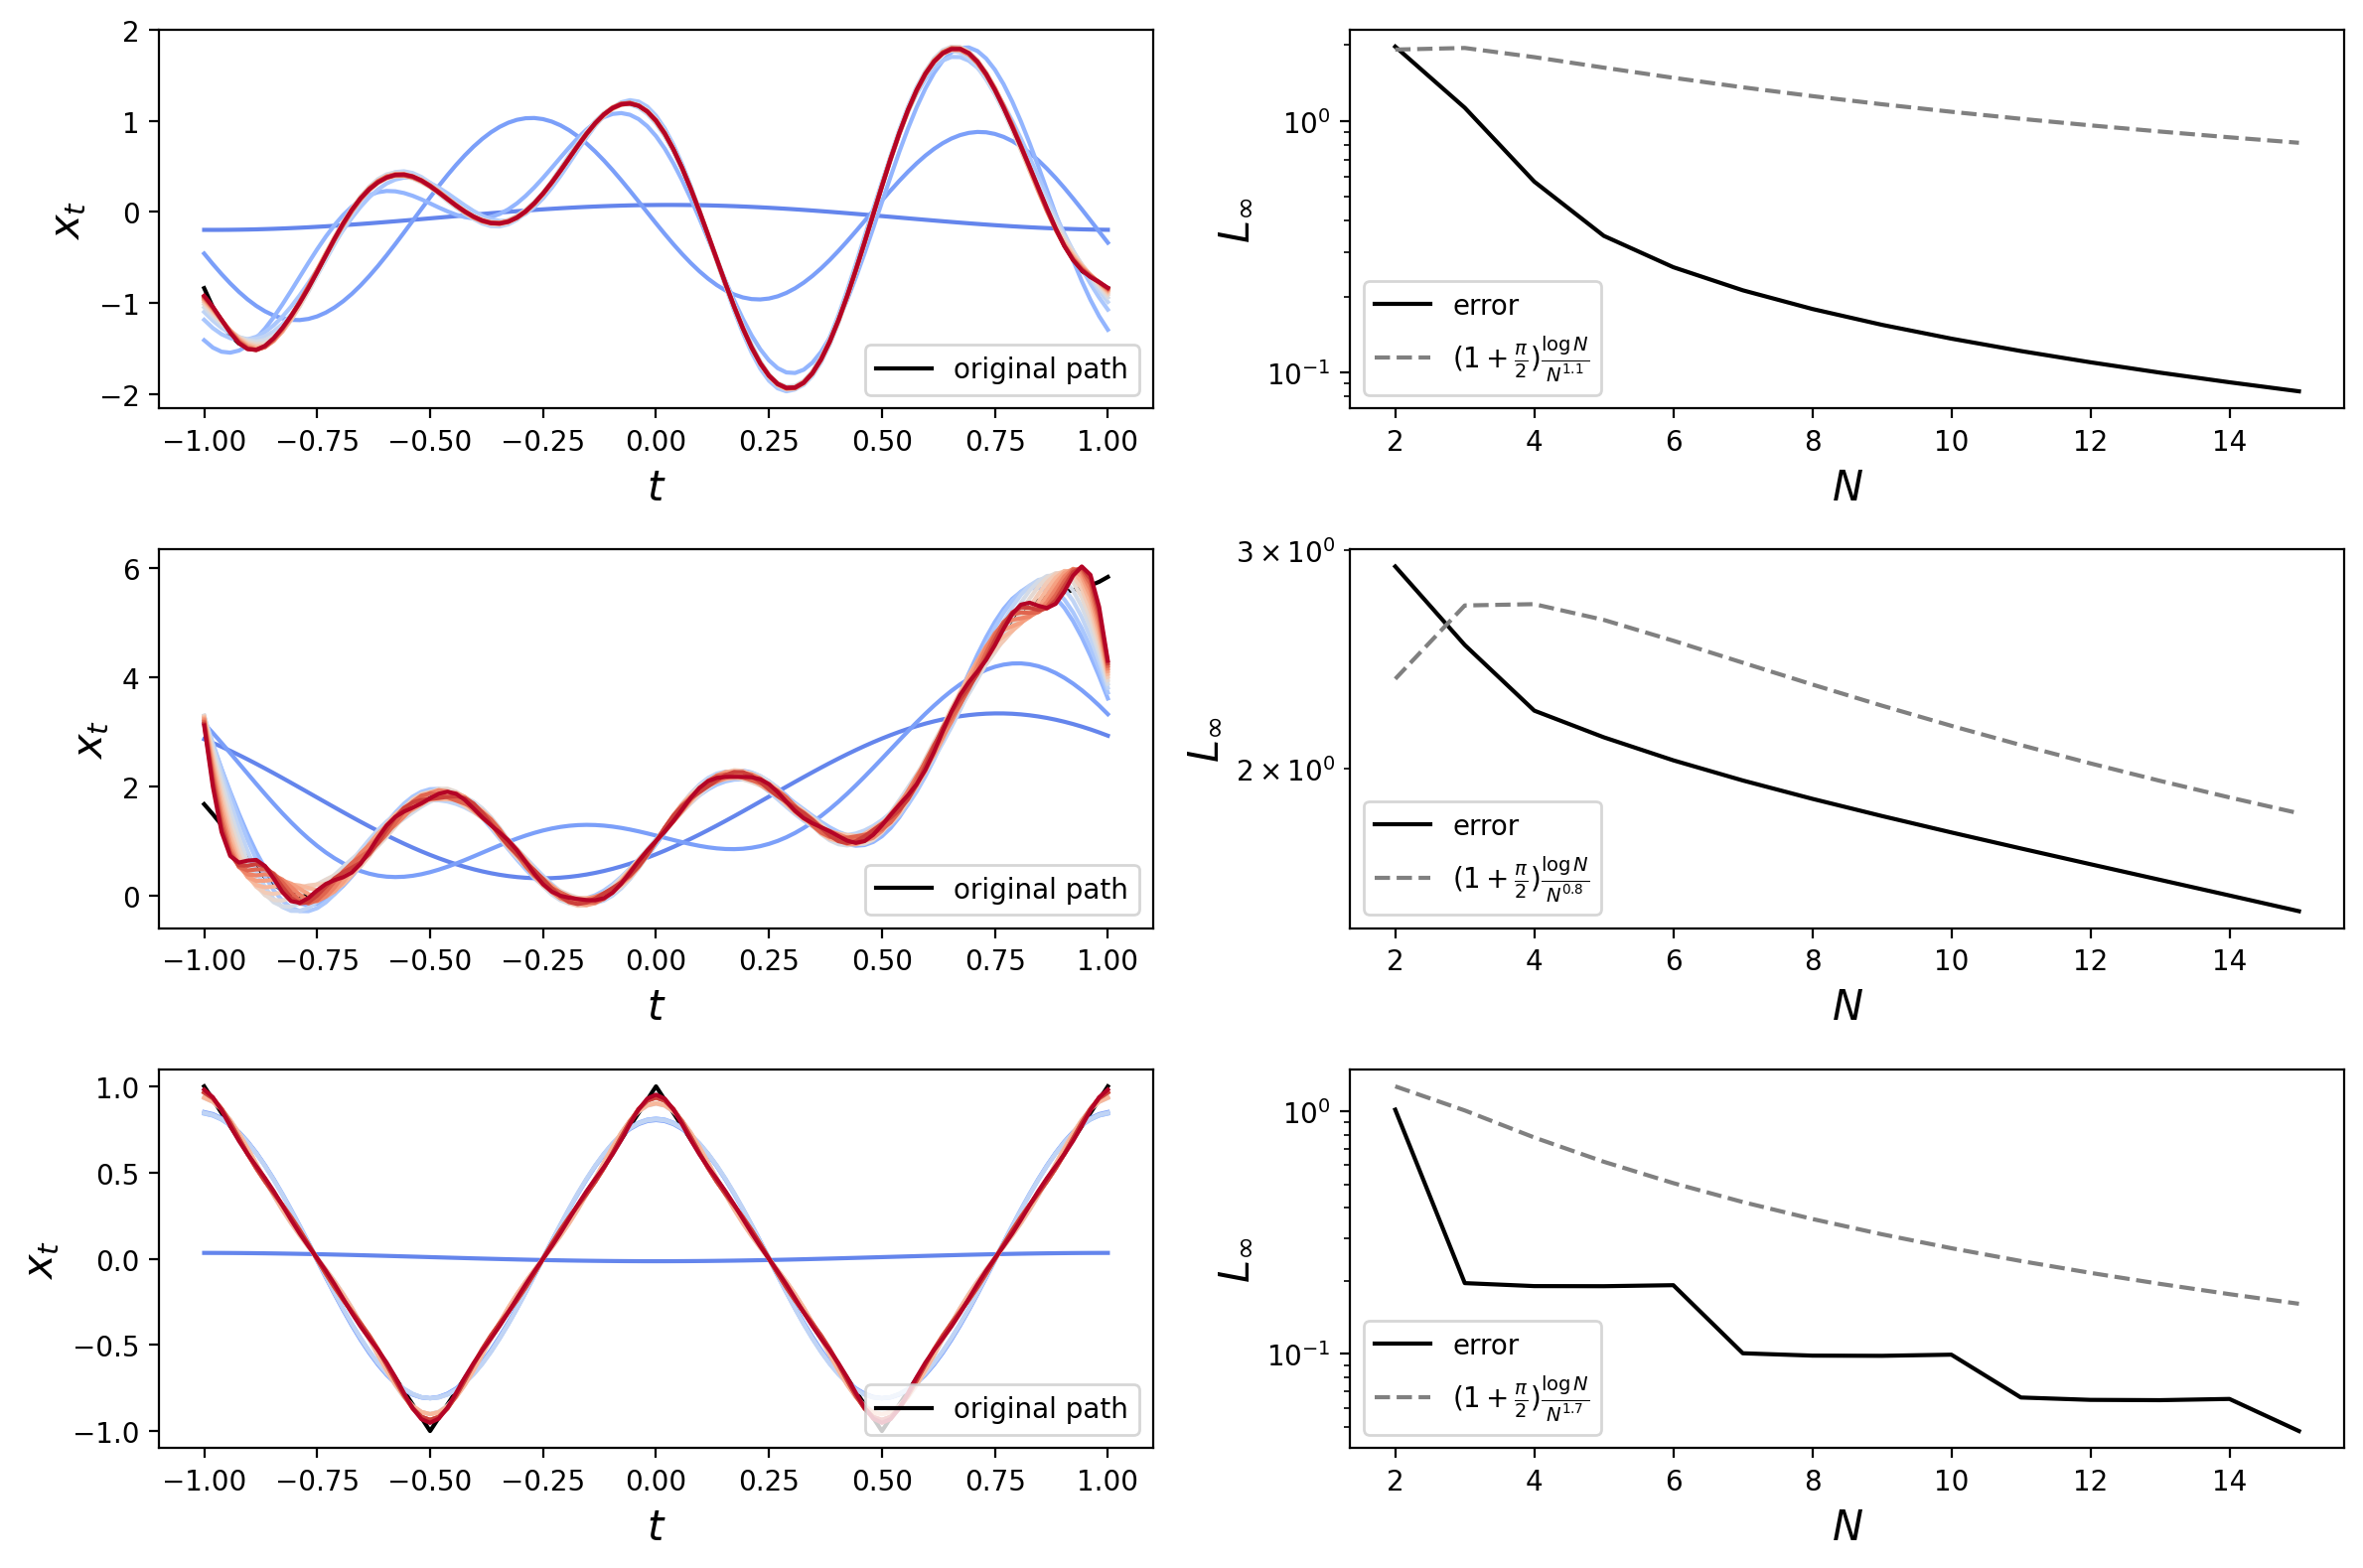

In [74]:
plt.figure(figsize=(12, 8), dpi=200)

plt.subplot(3, 2, 1)
path1 = x1(t_grid)
plt.plot(t_grid, path1, color='black', label='original path')
for n in tqdm(n_arr):
    plt.plot(t_grid, ifft_aug(fft_aug(path1, n), length, n), color=colors[n])
plt.xlabel(r'$t$', fontsize=15)
plt.ylabel(r'$x_t$', fontsize=15)
plt.legend(loc='lower right')

plt.subplot(3, 2, 2)
plt.plot(n_arr, [np.max(np.abs(ifft_aug(fft_aug(path1, n), length, n)-path1)) for n in n_arr], color='black', label='error')
plt.plot(n_arr, (1+np.pi**2/2)*np.log(n_arr)/n_arr**1.1, color='grey', label=r'$(1+\frac{\pi}{2})\frac{\log N}{N^{1.1}}$', linestyle='--')
plt.yscale('log')
plt.xlabel(r'$N$', fontsize=15)
plt.ylabel(r'$L_{\infty}$', fontsize=15)
plt.legend()

plt.subplot(3, 2, 3)
path2 = x2(t_grid)
plt.plot(t_grid, path2, color='black', label='original path')
for n in tqdm(n_arr):
    plt.plot(t_grid, ifft_aug(fft_aug(path2, n), length, n), color=colors[n])
plt.xlabel(r'$t$', fontsize=15)
plt.ylabel(r'$x_t$', fontsize=15)
plt.legend(loc='lower right')

plt.subplot(3, 2, 4)
plt.plot(n_arr, [np.max(np.abs(ifft_aug(fft_aug(path2, n), length, n)-path2)) for n in n_arr], color='black', label='error')
plt.plot(n_arr, (1+np.pi**2/2)*np.log(n_arr)/n_arr**0.8, color='grey', label=r'$(1+\frac{\pi}{2})\frac{\log N}{N^{0.8}}$', linestyle='--')
plt.yscale('log')
plt.xlabel(r'$N$', fontsize=15)
plt.ylabel(r'$L_{\infty}$', fontsize=15)
plt.legend(loc='lower left')

plt.subplot(3, 2, 5)
path3 = x3(t_grid)
plt.plot(t_grid, path3, color='black', label='original path')
for n in tqdm(n_arr):
    plt.plot(t_grid, ifft_aug(fft_aug(path3, n), length, n), color=colors[n])
plt.xlabel(r'$t$', fontsize=15)
plt.ylabel(r'$x_t$', fontsize=15)
plt.legend(loc='lower right')

plt.subplot(3, 2, 6)
plt.plot(n_arr, [np.max(np.abs(ifft_aug(fft_aug(path3, n), length, n)-path3)) for n in n_arr], color='black', label='error')
plt.plot(n_arr, (1+np.pi**2/2)*np.log(n_arr)/n_arr**1.7, color='grey', label=r'$(1+\frac{\pi}{2})\frac{\log N}{N^{1.7}}$', linestyle='--')
plt.yscale('log')
plt.xlabel(r'$N$', fontsize=15)
plt.ylabel(r'$L_{\infty}$', fontsize=15)
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('fourier_convergence.pdf')
plt.show()